# Homework Lecture 3: Bias-Variance Tradeoff

## Preliminaries

### Imports

In [1]:
import os
from datetime import date

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.optimize
import sklearn.datasets
from sklearn.linear_model import LinearRegression


%matplotlib inline


### Random Seed

In [2]:
seed=2506
np.random.seed(seed)

## Bias-Variance Trade-off

### Description of Problem

We will investigate the Bias-Variance decomposition in the learning problem of estimating the function
$$
    f(x) = \begin{cases}
                \max(0,1 - 1.7 x) \,\,\text{  for } x>0 \\
                \max(0,1 + 2 x)  \,\,\text{  for } x<0
            \end{cases}
$$
from data generated by the process
$$
    y = f(x) + \sigma(x) \,\epsilon
$$
where $\epsilon\sim \mathcal{N}(0,1)$ is Gaussian noise.
and
$$
    \sigma(x) = \sigma_0 \sqrt{ 1 - x^2}
$$
with  $\sigma_0=0.05$

In [3]:
sigma0=0.05

In [4]:
def f(x):
    slope=2-0.3*(x>0)
    return  np.maximum(0,1-slope*np.abs(x))

def sigma(x):
    return np.sqrt(1-x*x)*sigma0

### Visualize $f(x)$

<div class="alert alert-block alert-success"> Problem 0.1 </div>
Generate an array `X_test` of 101 uniformly space points in the range [-1,1]

In [5]:
X_test=np.linspace(-1,1,101)
X_test.shape

(101,)

<div class="alert alert-block alert-success"> Problem 0.2 </div>
plot the function $f(x)$ in the range [-1,1]


Text(0,0.5,'y')

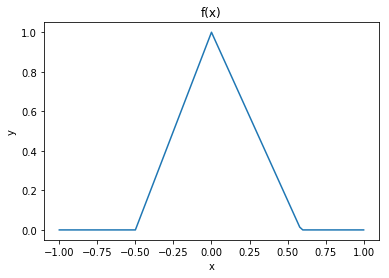

In [6]:
plt.plot(X_test,f(X_test))
plt.title("f(x)")
plt.xlabel("x")
plt.ylabel("y")

### Generate Sample data

<div class="alert alert-block alert-info"> Problem 1.0 </div>
using `numpy.random.uniform` generate `N`=50 random samples of $X$  in the range (-1,1)

In [7]:
N=50

In [8]:
X=np.random.uniform(-1,1,N)
X.shape

(50,)

<div class="alert alert-block alert-info"> Problem 1.1 </div>
using `numpy.random.normal` generate N=50 random samples of $Y$  acording to the process described in section 1.2

In [9]:
Y=f(X)+sigma(X)*np.random.normal(0,1,N)
Y.shape

(50,)

<div class="alert alert-block alert-info"> Problem 1.2 </div>
Plot the random sample of  `X` and `Y` that you generated and the true function on the same graph.

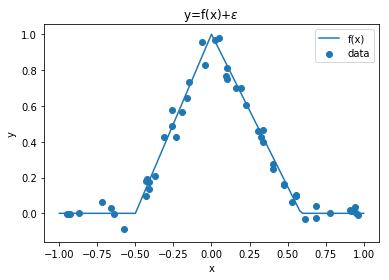

In [10]:
plt.scatter(X,Y,label="data")
plt.plot(X_test,f(X_test),label="f(x)")
plt.title("y=f(x)+$\epsilon$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

<div class="alert alert-block alert-info"> Problem 1.3 </div>
Write a python function `generate_sample_Y(N)` that, given an array of inputs X, returns an array `Y` of points generate acording to $f(x)+\sigma(x) \epsilon$

In [11]:
def generate_Y(X):
    Y=f(X)+sigma(X)*np.random.normal(0,1,len(X))
    return Y

<div class="alert alert-block alert-info"> Problem 1.4 </div>
Write a python function `generate_sample(N)` that returns and array `X` of 'N' uniformly distributed ooubts on [-1,1]  and and array `Y` ob  `N` points as per the process above

In [12]:
def generate_sample(X):
    X=np.random.uniform(-1,1,N)
    Y=generate_Y(X)
    return X,Y

### Hypothesis Space

Our hypothesis space $\mathcal{H}_K$ will be **symmetric** (even) polynomials $p(x)$ up to degree $K$.

<div class="alert alert-block alert-info"> Problem 2.1 </div>
Write a function `generate_basis(X,K)` that evalue a basis of $\mathcal{H}_K$  of even monomials at an array of given points `X` 

[HINT] You may want to refer to the writen homework for this week.

In [13]:
def generate_basis(X,K):
    Xi=X[:,np.newaxis]
    i=np.arange(0,K+1,2)
    M=np.power(Xi,i[np.newaxis,:])
    return M


<div class="alert alert-block alert-info"> Problem 2.2 </div>
Plot all basis functions up to K=6

In [14]:
H=generate_basis(X_test,6)
H.shape

(101, 4)

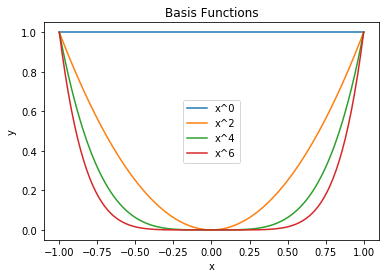

In [15]:
for i in range(H.shape[1]):
    plt.plot(X_test,H[:,i],label=f"x^{2*i}")
plt.title("Basis Functions")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

### Regression Solver

<div class="alert alert-block alert-info"> Problem 3.1 </div>

Fill in the bodies of the `fit` and `predict` functions in the `class` below so that they solve the learning problem for $\hat{h}$ the least square
approximation to $f(x)$ within our hypothesis space $\mathcal{H}$.

[HINT] 

1. You worked the math of this on assignment 2
2. The function `generate_basis`  can be useful
3. You can also look at how a similar problem is solved in the  [`BiasVarianceTradeOff`](.\BiasVarianceTradeOff.ipynb) notebook.

In [16]:
class RegressionSolver:
    def __init__(self,K):
        self.K=K
        self.base_model=LinearRegression(fit_intercept=False)
    def fit(self,X,Y):
        H=generate_basis(X,self.K)
        self.base_model.fit(H,Y)
    def predict(self,X):
        H=generate_basis(X,self.K)
        return self.base_model.predict(H)

<div class="alert alert-block alert-info"> Problem 3.2 </div>

1. fit the `X`, `Y` data you generated before to our model assuming K=10.
2. Plot the predicted values $\hat{h}(x)$ on the points defined by `X_test`

Compare to the true function $f(x)$.

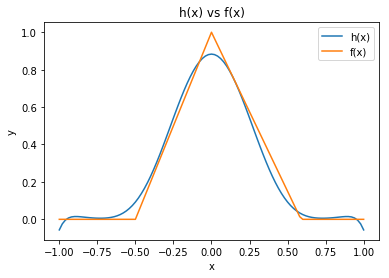

In [17]:
K=10
model=RegressionSolver(K)
model.fit(X,Y)
y=model.predict(X_test)
plt.plot(X_test,y,label="h(x)")
plt.plot(X_test,f(X_test),label="f(x)")
plt.title("h(x) vs f(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

<div class="alert alert-block alert-info"> Problem 3.3 </div>
Compute the *in sample* mean training square error

In [18]:
np.mean((Y-model.predict(X))**2)

0.003335541296990926

<div class="alert alert-block alert-info"> Problem 3.4 </div>
Generate 100 new data points and compute the *out of sample* mean test error

In [19]:
X,Y=generate_sample(N)
np.mean((Y-model.predict(X))**2)

0.00277690270532278

###  Bias-Variance Decomposition

<div class="alert alert-block alert-info"> Problem 4.1 </div>
Using still K=10, N=50

Reserve some space so that you can keep track of the average of $\hat{h}(x)$ and $(\hat{h}(x))^2$ at each point in `X_test`

Using R=1,000 repeats do as follows
1. Generate N random samples of X,Y according to our process specification.
2. Fit model to the data
3. Compute $\hat{h}$ on the uniform grid X_test
4. Accumulate results so that you can later  compute the average of $\hat{h}(x)$  and $(\hat{h}(x))^2$ over each point in `X_test`.
4. Use function `generate_Y`  to generate new  `Y_test` values at each  point in `X_test`.
5. Compute the square error $\left(Y_{test}-\hat{h}(x)\right)^2$ at each point in `X_test`.
6. Accumulate results so that you can compute the average square error averaged  over all the 'R` repeats of the procedure

Using the results of the `R` repeats above
1. Compute the average over the `R` repeats of $\hat{h}$ evaluated at each point in `X_test` 
1. Compute the average over the `R` repeats of $(\hat{h})^2$ evaluated at each pint in `X_test` 
2. Compute the mean square error of `Y_test` over the points `X_test` 

In [20]:
model=RegressionSolver(10)
R=1000
Y_av=np.zeros(len(X_test))
Y_sq=np.zeros(len(X_test))
E=np.zeros(len(X_test))
for r in range(R):
    X,Y=generate_sample(N)
    model.fit(X,Y)
    h=model.predict(X_test)
    Y_test=generate_Y(X_test)
    Y_av+=h
    Y_sq+=h**2
    E+=(Y_test-h)**2
Y_av/=R
Y_sq/=R
E/=R

<div class="alert alert-block alert-info"> Problem 4.1 </div>
Plot the average of the prediction $\hat{h}$(x) at the points `X_test`. Compare to the actual function

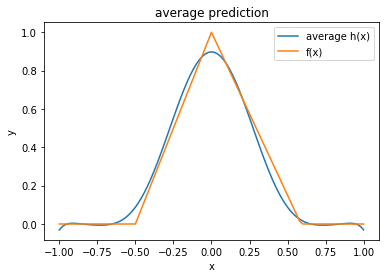

In [21]:
plt.plot(X_test,Y_av,label="average h(x)")
plt.plot(X_test,f(X_test),label="f(x)")
plt.title("average prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [22]:
### Note that $f(x)$ has a slight asymetry that can not be modelled by h.

<div class="alert alert-block alert-info"> Problem 4.2 </div>
Compute the bias at each point in `X_test`

In [23]:
bias=( f(X_test)-Y_av)**2

<div class="alert alert-block alert-info"> Problem 4.3 </div>
Compute the variance  at each point in `X_test`

In [24]:
variance= Y_sq - Y_av**2

<div class="alert alert-block alert-info"> Problem 4.4 </div>
Show that `bias` + `variance` + irreductible error $\sigma^2$ approximately add up to the mean square prediction error for each point in `X_test`

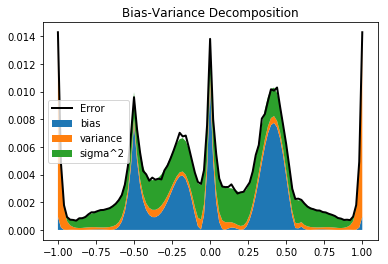

In [25]:
plt.fill_between(X_test,0,bias,label="bias")
plt.fill_between(X_test,bias,bias+variance,label="variance")
plt.fill_between(X_test,bias+variance,bias+variance+sigma(X_test)**2,label="sigma^2")
plt.plot(X_test,E,"k",label="Error",linewidth=2)

plt.title("Bias-Variance Decomposition")
plt.legend()

<div class="alert alert-block alert-info"> Problem 4.5 </div>
In which regions does the bias contribution dominate the prediction error? In which regions does variance  dominate?
In which regions dominates irreducible error?

In [26]:
# Bias:  Aroud -0.5, 0, and 0.5
# Variance: Around -1 and 1
# Irreducible error: around -0.75 and 0.75

### Bias-Variance Trade-off

<div class="alert alert-block alert-info"> Problem 5.1 </div>
Using still N=50 training sample points, and, averaging over $R=1,000$ repeats find the value of $K$ that has the optimal bias-variance trade-off when averaged over all the points in  `X_test`.

[HINT] Do not need to consider K larger than 14, as variance becomes very large. 

In [27]:
N=50
X,Y=generate_sample(N)
Y_test=generate_Y(X_test)
errors=[]
Ks=range(0, 16,2)

for K in Ks:
    E=0
    for r in range(R):
        X,Y=generate_sample(N)
        model=RegressionSolver(K)
        model.fit(X,Y)
        E+=np.mean((model.predict(X_test)-Y_test)**2)
    E/=R
    errors.append(E)
errors=np.array(errors)  

Text(0,0.5,'Error')

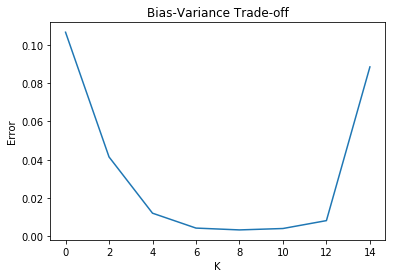

In [28]:
plt.plot(Ks,errors)
plt.title("Bias-Variance Trade-off")
plt.xlabel("K")
plt.ylabel("Error")

In [29]:
Ks[errors.argmin()],errors.min()

(8, 0.0034175491976194583)

<div class="alert alert-block alert-info"> Problem 5.3 </div>
In what values  of $K$ does bias dominates, in what region does variance dominate?

In [30]:
# Ranges are approximate, there is no sharp cutt of:
# Bias:  K < 6
# Variance K> 10 or 12

<div class="alert alert-block alert-info"> Problem 5.3 </div>
Can the bias be made arbitrarily close to zero by increasing $K$? Explain your reasoning

In [31]:
# No, because the hypothesis space is symmetric functions, but f(x) is not symetric.
# No matter how large $K$ we can never achive f(x).

## Factor Modeling of the US Treasury Yield Curve

In [32]:
treasury_data_dir="../../data/finance"

<div class="alert alert-block alert-info"> Problem 6.0 </div>
Load into a panda's DataFrame the  H15 US Treasury data set for the period **1993-2002**
(The file should had been generated by running the `FinancialDataSets` notebook, and it was called `H15_old.csv`.

In [33]:
H15_old=pd.read_csv(treasury_data_dir+"/H15_old.csv",index_col=[0],parse_dates=[0])
H15_old.tail()

,3M,6M,1Y,2Y,3Y,5Y,7Y,10Y,20Y,30Y
DATE,,,,,,,,,,
2002-02-11,1.75,1.86,2.21,2.95,3.49,4.29,4.70,4.91,5.63,5.41
2002-02-12,1.75,1.87,2.26,3.04,3.58,4.36,4.76,4.97,5.69,5.45
2002-02-13,1.76,1.87,2.27,3.09,3.63,4.40,4.80,5.01,5.72,5.47
2002-02-14,1.75,1.86,2.26,3.07,3.59,4.35,4.76,4.95,5.64,5.42
2002-02-15,1.74,1.84,2.20,2.97,3.50,4.27,4.66,4.86,5.58,5.37


<div class="alert alert-block alert-info"> Problem 6.1 </div>
1. Separate the dataset into a training set for all dates before 1998-12-31 and a testing set will all dates afterwards


In [34]:
old_test_period=date(1998,12,31)

In [35]:
H15_old_train=H15_old[:old_test_period]
H15_old_train.head()

,3M,6M,1Y,2Y,3Y,5Y,7Y,10Y,20Y,30Y
DATE,,,,,,,,,,
1993-10-01,2.98,3.11,3.35,3.84,4.18,4.72,5.03,5.34,6.12,5.98
1993-10-04,3.02,3.17,3.35,3.85,4.16,4.71,5.04,5.34,6.10,5.99
1993-10-05,3.06,3.20,3.38,3.86,4.18,4.72,5.05,5.35,6.12,6.01
1993-10-06,3.04,3.19,3.36,3.85,4.16,4.70,5.05,5.35,6.12,6.01
1993-10-07,3.05,3.17,3.35,3.83,4.15,4.69,5.05,5.33,6.11,6.01


In [36]:
H15_old_test=H15_old[old_test_period:]
H15_old_test.head()

,3M,6M,1Y,2Y,3Y,5Y,7Y,10Y,20Y,30Y
DATE,,,,,,,,,,
1998-12-31,4.48,4.55,4.53,4.54,4.55,4.56,4.73,4.65,5.39,5.09
1999-01-04,4.49,4.57,4.58,4.58,4.57,4.57,4.75,4.69,5.42,5.15
1999-01-05,4.48,4.57,4.56,4.64,4.64,4.62,4.80,4.74,5.48,5.21
1999-01-06,4.47,4.55,4.53,4.62,4.62,4.61,4.76,4.73,5.42,5.17
1999-01-07,4.44,4.49,4.51,4.63,4.63,4.62,4.82,4.77,5.48,5.23


<div class="alert alert-block alert-info"> Problem 6.2 </div>
Compute the daily rate changes for the training and test datasets

In [37]:
dH15_old_train=(H15_old_train.shift()-H15_old_train).dropna()
dH15_old_train.head()

,3M,6M,1Y,2Y,3Y,5Y,7Y,10Y,20Y,30Y
DATE,,,,,,,,,,
1993-10-04,-0.04,-0.06,0.00,-0.01,0.02,0.01,-0.01,0.00,0.02,-0.01
1993-10-05,-0.04,-0.03,-0.03,-0.01,-0.02,-0.01,-0.01,-0.01,-0.02,-0.02
1993-10-06,0.02,0.01,0.02,0.01,0.02,0.02,0.00,0.00,0.00,0.00
1993-10-07,-0.01,0.02,0.01,0.02,0.01,0.01,0.00,0.02,0.01,0.00
1993-10-08,0.00,0.01,0.02,0.05,0.06,0.08,0.09,0.07,0.09,0.09


In [38]:
dH15_old_test=(H15_old_test.shift()-H15_old_test).dropna()
dH15_old_test.head()

,3M,6M,1Y,2Y,3Y,5Y,7Y,10Y,20Y,30Y
DATE,,,,,,,,,,
1999-01-04,-0.01,-0.02,-0.05,-0.04,-0.02,-0.01,-0.02,-0.04,-0.03,-0.06
1999-01-05,0.01,0.00,0.02,-0.06,-0.07,-0.05,-0.05,-0.05,-0.06,-0.06
1999-01-06,0.01,0.02,0.03,0.02,0.02,0.01,0.04,0.01,0.06,0.04
1999-01-07,0.03,0.06,0.02,-0.01,-0.01,-0.01,-0.06,-0.04,-0.06,-0.06
1999-01-08,-0.04,-0.04,-0.06,-0.08,-0.08,-0.10,-0.10,-0.09,-0.09,-0.03


## Multi-factor Gaussian model
The G2 Factor model can be generalized to K factors by defining
$$
    \Delta R(T)_t = \sum_{k=1}^K H_k(T) \Delta r_{t,k}
$$
where $\Delta r_{t,k}$ are the $K$ daily changes in interest  rate factors as of date $t$.

The factor loadings for each tenor $T$ are
$$
    H_k(T) = \frac{e^{-\lambda_k T} -1}{\lambda_k T}
$$

<div class="alert alert-block alert-info"> Problem 6.3 </div>
Using as a guide the class  `G2_FactorModel` and the function `errors_30Y_factors` from the `Treasury_CurveModel` notebook fit models with 2,  3  factors to predict the 30Y treasury rate change.

Fit both models to the training data set

In [39]:
# It is easier to write a model that can fit an arbitray number of factors
class FactorModel:
    def __init__(self,lambdas):
        self.lambdas=lambdas
    def H(self,t):
        phi=self.lambdas[np.newaxis,:]*t[:,np.newaxis]
        return (1-np.exp(-phi))/phi

In [40]:
# we just compute the solution like we did in the Treasury_CurveModel notebook
# but for an arbitrary number of factors
def errors_30Y_factors(lambdas,dRates,tenors):
    yc=FactorModel(lambdas)
    T=tenors[:-1]
    x=dRates[:,:-1]
    W=np.diag(T)
    H_all=yc.H(tenors)
    H=H_all[:-1,:]  # loadings for all tenors but 30Y
    H30=H_all[-1,:] # loadings for the 30Y point.
    N=np.dot(H.T,np.dot(W,H))
    Ninv=np.linalg.inv(N)
    P=np.dot(Ninv,np.dot(H.T,W))
    r=np.dot(x,P.T)
    E=dRates[:,-1]-np.dot(r,H30)
    return E

In [41]:
def x_to_factors(x):
    l=0
    lambdas=np.empty(len(x))
    for i1 in range(len(x)):
        lambdas[i1]=l+np.exp(-x[i1]) # [ 0, infinity]
        #l+=lambdas[i1]
    return lambdas

In [42]:
def factors_to_x(lambdas):
    x=np.empty(len(lambdas))
    l=0
    for i1 in range(len(x)):    
        x[i1]=-np.log(lambdas[i1]-l)
        #l+=lambdas[i1]
    return x

In [43]:
def factor_function(x,rates,tenors):
    lambdas=x_to_factors(x)
    return errors_30Y_factors(lambdas,rates.values,tenors)

In [44]:
tenors=np.array([3.0/12,6.0/12,1,2,3,5,7,10,20,30])

In [45]:
# 2 factor model
lambdas=np.array([0.01,0.5])
x0=factors_to_x(lambdas)
fit=scipy.optimize.least_squares(factor_function,x0,method="lm",args=(dH15_old_train,tenors))
lambdas2=x_to_factors(fit.x)
print(lambdas2)

[0.02685596 0.38241246]


In [46]:
# 3 factor model
lambdas=np.array([0.01,0.1,0.25])
x0=factors_to_x(lambdas)
fit=scipy.optimize.least_squares(factor_function,x0,method="lm",args=(dH15_old_train,tenors))
lambdas3=x_to_factors(fit.x)
print(lambdas3)

[1.25392316 1.25930589 0.01819037]


<div class="alert alert-block alert-info"> Problem 6.4 </div>
Compute the training and test mean square error of the 2 and 3 factor models

In [47]:
dtrain_errors2=errors_30Y_factors(lambdas2,dH15_old_train.values,tenors)
err_train2=np.mean(dtrain_errors2**2)
dtest_errors2=errors_30Y_factors(lambdas2,dH15_old_test.values,tenors)
err_test2=np.mean(dtest_errors2**2)
print("Two Factors",err_train2,err_test2)

Two Factors 0.00011693805429743445 0.00022925543494029899


In [48]:
dtrain_errors3=errors_30Y_factors(lambdas3,dH15_old_train.values,tenors)
err_train3=np.mean(dtrain_errors3**2)
dtest_errors3=errors_30Y_factors(lambdas3,dH15_old_test.values,tenors)
err_test3=np.mean(dtest_errors3**2)
print("Three Factors",err_train3,err_test3)

Three Factors 0.00011348332454179842 0.00022293687904754967


<div class="alert alert-block alert-info"> Problem 6.5 </div>
Does the 2 or 3 factor models has lower training mean squared error? and for the testing data?

In [49]:
# The 3 factor model has lower mean squared error both for training and testing data

<div class="alert alert-block alert-info"> Problem 6.6 </div>
What are the training and test $R^2$ for the two and 3 factor models

In [50]:
var_train=dH15_old_train["30Y"].var()
var_test=dH15_old_test["30Y"].var()

In [51]:
print("Two Factors",1-err_train2/var_train,1-err_test2/var_test)

Two Factors 0.9569183785068751 0.9111201204170758


In [52]:
print("Three Factors",1-err_train3/var_train,1-err_test3/var_test)

Three Factors 0.9581911494674281 0.9135697569416441


<div class="alert alert-block alert-info"> Problem 6.7 </div>
Does difference  betwen the 2 and 3 factor models look significant?

In [53]:
# No the improvement is very small (less than 3% or the variance)
1-err_test3/err_test2

0.027561204358774516

<div class="alert alert-block alert-success"> Note </div>
It is not hard to fit the model to up to 10 factors, to see the bias-variance trade-off

The improvements, after 2 factors, however, are minimal.

In [54]:
lambda0=np.array([0.01,0.1,0.25,0.5,1,1.5,3,4])
results=[]
for i1 in range(1,9):
    
    x0=factors_to_x(lambda0[:i1])
    fit=scipy.optimize.least_squares(factor_function,x0,method="lm",args=(dH15_old_train,tenors))
    lambdas=x_to_factors(fit.x)
    print(i1,lambdas)
    dtrain_errors=errors_30Y_factors(lambdas,dH15_old_train.values,tenors)
    err_train=np.mean(dtrain_errors**2)
    dtest_errors=errors_30Y_factors(lambdas,dH15_old_test.values,tenors)
    err_test=np.mean(dtest_errors**2)
    results.append((len(lambdas),1-err_train/var_train,1-err_test/var_test))
results=pd.DataFrame(results,columns=["Factors","Train","Test"])
results

1 [0.01264569]
2 [0.02685598 0.38241146]
3 [1.25392316 1.25930589 0.01819037]
4 [1.47666146e+00 5.05154562e+01 1.83924256e-02 1.46607703e+00]
5 [3.44198010e+01 2.44427850e+02 3.08641124e-01 1.10875760e+02
 5.65673349e-03]
6 [9.57546922e-01 6.69725770e+04 1.06788315e+05 1.21780489e+08
 2.10554637e+00 4.22550816e-03]
7 [5.84759007e+02 3.40656921e+01 1.97936029e-03 1.37153087e+00
 1.17678023e+01 1.00410227e-01 6.20432857e+00]
8 [3.07351248e+00 8.31990539e+02 6.95861352e-05 3.58160204e+01
 3.93198212e-01 1.32025296e+00 1.63964937e+00 7.77022640e+00]


,Factors,Train,Test
0,1,0.926371,0.822255
1,2,0.956918,0.911120
2,3,0.958191,0.913570
3,4,0.958230,0.913880
4,5,0.948732,0.912177
5,6,0.953464,0.907774
6,7,0.899415,0.855158
7,8,0.928001,0.888386


Text(0.5,1,'$R^2$')

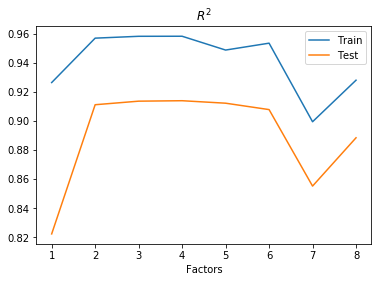

In [55]:

results.plot(x="Factors")
ax=plt.gca()
ax.set_title("$R^2$")

The Decrease of both testing and training $R^2$ after 6 factors is due to the optimization algorithm failing to converge.

With more factors we should always be able to lower training $R^2$.